# Regressão Linear

Regressão linear com base no curso Machine Learning Coursera Andrew Ng

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly

In [3]:
def computeCost(X, y, theta):
    h = np.dot(X, theta)  # hipotese
    J = sum((1/(2*m))*((h-y)**2))  # funcao custo
    return J

def gradientDescent(X, y, theta, alpha, n_iter):
    J_hist = []
    X_t = X.transpose()
    m = len(y)
    i = 0
    while i < n_iter:
        
        h = np.dot(X, theta) - y
        theta = theta - alpha*((1/m)*np.dot(X_t, h))
        
        J_hist.append(computeCost(X, y, theta))
        
        i += 1
    return theta, J_hist

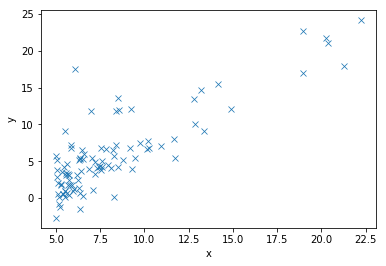

In [4]:
df = pd.read_csv("ex1data1.txt", header = None, names = ["x", "y"])
df.head()
sns.scatterplot(x = "x", y = "y", data=df, marker = "x")

In [5]:
X = df["x"].to_numpy()
y = df["y"].to_numpy()
# quantidade de variaveis
m = len(y)
# X com bias (vetor com 1)
X = np.array([np.ones(m), X]).transpose()

In [6]:
theta = np.array([0, 0])
display(computeCost(X, y, theta))
theta = np.array([-1, 2])
display(computeCost(X, y, theta))

32.072733877455676

54.24245508201239

In [7]:
theta = np.array([0, 0])
n_iter = 1500
alpha = 0.01
theta_new, cost_history = gradientDescent(X, y, theta, alpha, n_iter)

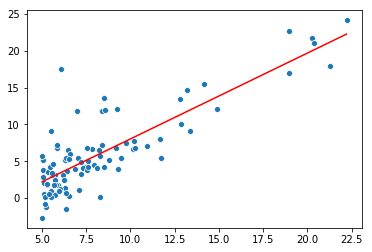

In [8]:
sns.scatterplot(X[:, 1], y)
sns.lineplot(X[:, 1], np.dot(X,theta_new), color='red')

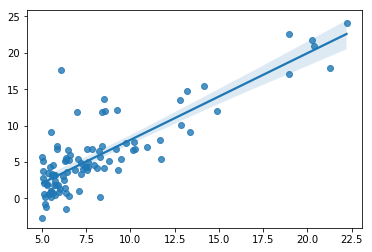

In [9]:
sns.regplot(X[:, 1], y)

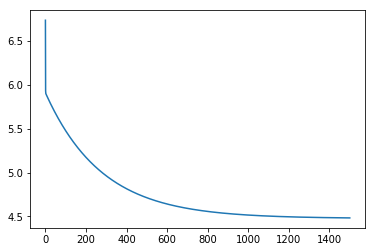

In [10]:
plt.plot(np.linspace(0,n_iter, n_iter), cost_history)

In [11]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i, j] = computeCost(X, y, t)
# por causa do plot_surf e contour usarem como entrada valores preprocessados por np.meshgrid
# precisamos usar a transposta para nao plotar errado
J_vals = J_vals.T



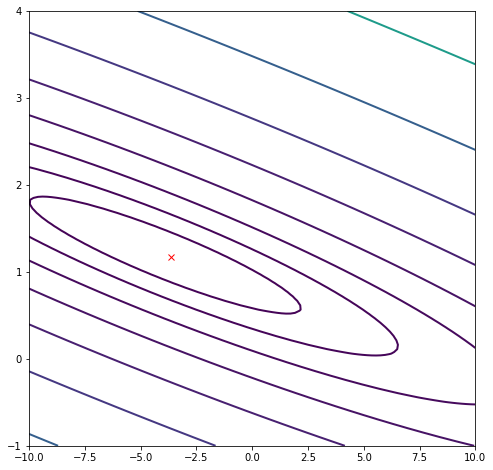

In [12]:
plt.figure(figsize=(8,8))
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.plot(theta_new[0], theta_new[1], 'rx')

In [19]:
df = pd.read_csv("ex1data2.txt", header = None, names = ["size", "n_bedroom", "price"])
df.sample(5)

,size,n_bedroom,price
36,1239,3,229900
33,3137,3,579900
8,1380,3,212000
1,1600,3,329900
21,1888,2,255000


### Feature normalization

In [75]:
np.ones(m).reshape(1,-1)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [69]:
df_norm = df.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [80]:
X = df_norm[["size", "n_bedroom"]].to_numpy()
y = df_norm["price"].to_numpy()
# quantidade de variaveis
m = len(y)
# X com bias (vetor com 1)
X = np.append([np.ones(m).reshape(1,-1)], X).transpose()

In [81]:
X

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.31415422e-01,
       -2.26093368e-01, -5.09640698e-01, -2.26093368e-01,  5.07908699e-01,
       -2.26093368e-01, -